In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from IPython.display import display
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')

In [21]:
baseline_results = pd.read_csv('baseline_results.csv')
baseline_results.replace({'ftl_mlp_initializer': 'FTL'}, inplace=True)

pearson_results = pd.read_csv('pearson_results.csv')
pearson_results.replace({'ftl_mlp_initializer': 'PReg-FTL'}, inplace=True)

spearman_results = pd.read_csv('spearman_results.csv')
spearman_results.replace({'ftl_mlp_initializer': 'SReg-FTL'}, inplace=True)

results = pd.concat([baseline_results, pearson_results, spearman_results])

In [22]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [23]:
results.replace({'adult_dataset_reader': 'Adult Income', 'compas_dataset_reader': 'Compas Recidivism', 'german_dataset_reader': 'German Credit', 'bank_dataset_reader': 'Bank Marketing'}, inplace=True)
results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [24]:
display(results)

,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity,solution
0,Adult Income,FTL,mcc_parity,0.494246,0.834936,0.559881,0.105715,0.065635,0.192739,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
1,Adult Income,FTL,mcc_odds,0.526651,0.844002,0.575709,0.049059,0.170094,0.018271,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
2,Adult Income,FTL,mcc_opportunity,0.528761,0.823328,0.590304,0.099124,0.259137,0.061543,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
3,Adult Income,FTL,acc_parity,0.728663,0.836263,0.530541,0.024246,0.107601,0.027139,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
4,Adult Income,FTL,acc_odds,0.824289,0.839469,0.526192,0.015181,0.104461,0.002116,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
...,...,...,...,...,...,...,...,...,...,...
67,Adult Income,SReg-FTL,mcc_odds,0.539093,0.843449,0.580012,0.040919,0.166083,0.012468,"{'corr_type': 'spearman', 'l2': 0.001, 'dropou..."
68,Adult Income,SReg-FTL,mcc_opportunity,0.585072,0.842233,0.589531,0.046258,0.188986,0.004459,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo..."
69,Adult Income,SReg-FTL,acc_parity,0.791413,0.815810,0.436570,0.218489,0.024396,0.389870,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo..."
70,Adult Income,SReg-FTL,acc_odds,0.792800,0.844223,0.557665,0.051423,0.122700,0.063949,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo..."


In [25]:
datasets = results['dataset'].unique().tolist()
datasets

['Adult Income']

In [26]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [27]:
fitness_rules_target_metrics = {
    'mcc_parity': ('Mathew Correlation', 'Statistical Parity'),
    'mcc_opportunity': ('Mathew Correlation', 'Equal Opportunity'),
    'mcc_odds': ('Mathew Correlation', 'Equalized Odds'),
    'acc_parity': ('Accuracy', 'Statistical Parity'),
    'acc_opportunity': ('Accuracy', 'Equal Opportunity'),
    'acc_odds': ('Accuracy', 'Equalized Odds')
}
fitness_rules_abvr = {
    'mcc_parity': 'Max(MCC - Stat. Parity)',
    'mcc_opportunity': 'Max(MCC - Eq. Odds)',
    'mcc_odds': 'Max(MCC - Eq. Opp.)',
    'acc_parity': 'Max(Acc - Stat. Parity)',
    'acc_opportunity': 'Max(Acc - Eq. Odds)',
    'acc_odds':  'Max(Acc - Eq. Opp.)'
}

In [28]:
results['Performance'] = 0
results['Fairness'] = 0
results['Fitness Rule'] = ''
for fitness_rule, (performance_metric, fairness_metric) in fitness_rules_target_metrics.items():
    results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fairness'] = results.loc[results.fitness_rule == fitness_rule,fairness_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule Abvr'] = fitness_rules_abvr[fitness_rule]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule'] = 'Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule]

display(results)

/tmp/ipykernel_1364125/211384797.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.55988104 0.49558867 0.47660518 0.53020884 0.49731155 0.48088379
 0.50936495 0.52610501 0.50501965 0.49517103 0.52255177 0.48277552
 0.49360563 0.49928347 0.49428572 0.50830079 0.5315851  0.49084885
 0.49727459 0.52602458 0.51498102 0.49446574 0.52981801 0.51333191
 0.51460142 0.49477946 0.4559726  0.49333343 0.53090834 0.49284321
 0.48727491 0.46760391 0.48532912 0.48816006 0.49060769 0.50033309
 0.54306751 0.52179051 0.4829124  0.51199556 0.52334945 0.50003926]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
/tmp/ipykernel_1364125/211384797.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas

,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity,solution,Performance,Fairness,Fitness Rule,Fitness Rule Abvr
0,Adult Income,FTL,mcc_parity,0.494246,0.834936,0.559881,0.105715,0.065635,0.192739,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':...",0.559881,0.065635,Max(Mathew Correlation - Statistical Parity),Max(MCC - Stat. Parity)
1,Adult Income,FTL,mcc_odds,0.526651,0.844002,0.575709,0.049059,0.170094,0.018271,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':...",0.575709,0.049059,Max(Mathew Correlation - Equalized Odds),Max(MCC - Eq. Opp.)
2,Adult Income,FTL,mcc_opportunity,0.528761,0.823328,0.590304,0.099124,0.259137,0.061543,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':...",0.590304,0.061543,Max(Mathew Correlation - Equal Opportunity),Max(MCC - Eq. Odds)
3,Adult Income,FTL,acc_parity,0.728663,0.836263,0.530541,0.024246,0.107601,0.027139,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':...",0.836263,0.107601,Max(Accuracy - Statistical Parity),Max(Acc - Stat. Parity)
4,Adult Income,FTL,acc_odds,0.824289,0.839469,0.526192,0.015181,0.104461,0.002116,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':...",0.839469,0.015181,Max(Accuracy - Equalized Odds),Max(Acc - Eq. Opp.)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Adult Income,SReg-FTL,mcc_odds,0.539093,0.843449,0.580012,0.040919,0.166083,0.012468,"{'corr_type': 'spearman', 'l2': 0.001, 'dropou...",0.580012,0.040919,Max(Mathew Correlation - Equalized Odds),Max(MCC - Eq. Opp.)
68,Adult Income,SReg-FTL,mcc_opportunity,0.585072,0.842233,0.589531,0.046258,0.188986,0.004459,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo...",0.589531,0.004459,Max(Mathew Correlation - Equal Opportunity),Max(MCC - Eq. Odds)
69,Adult Income,SReg-FTL,acc_parity,0.791413,0.815810,0.436570,0.218489,0.024396,0.389870,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo...",0.815810,0.024396,Max(Accuracy - Statistical Parity),Max(Acc - Stat. Parity)
70,Adult Income,SReg-FTL,acc_odds,0.792800,0.844223,0.557665,0.051423,0.122700,0.063949,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo...",0.844223,0.051423,Max(Accuracy - Equalized Odds),Max(Acc - Eq. Opp.)


In [32]:
methods = ['FTL', 'PReg-FTL', 'SReg-FTL']

/tmp/ipykernel_1364125/1656981651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


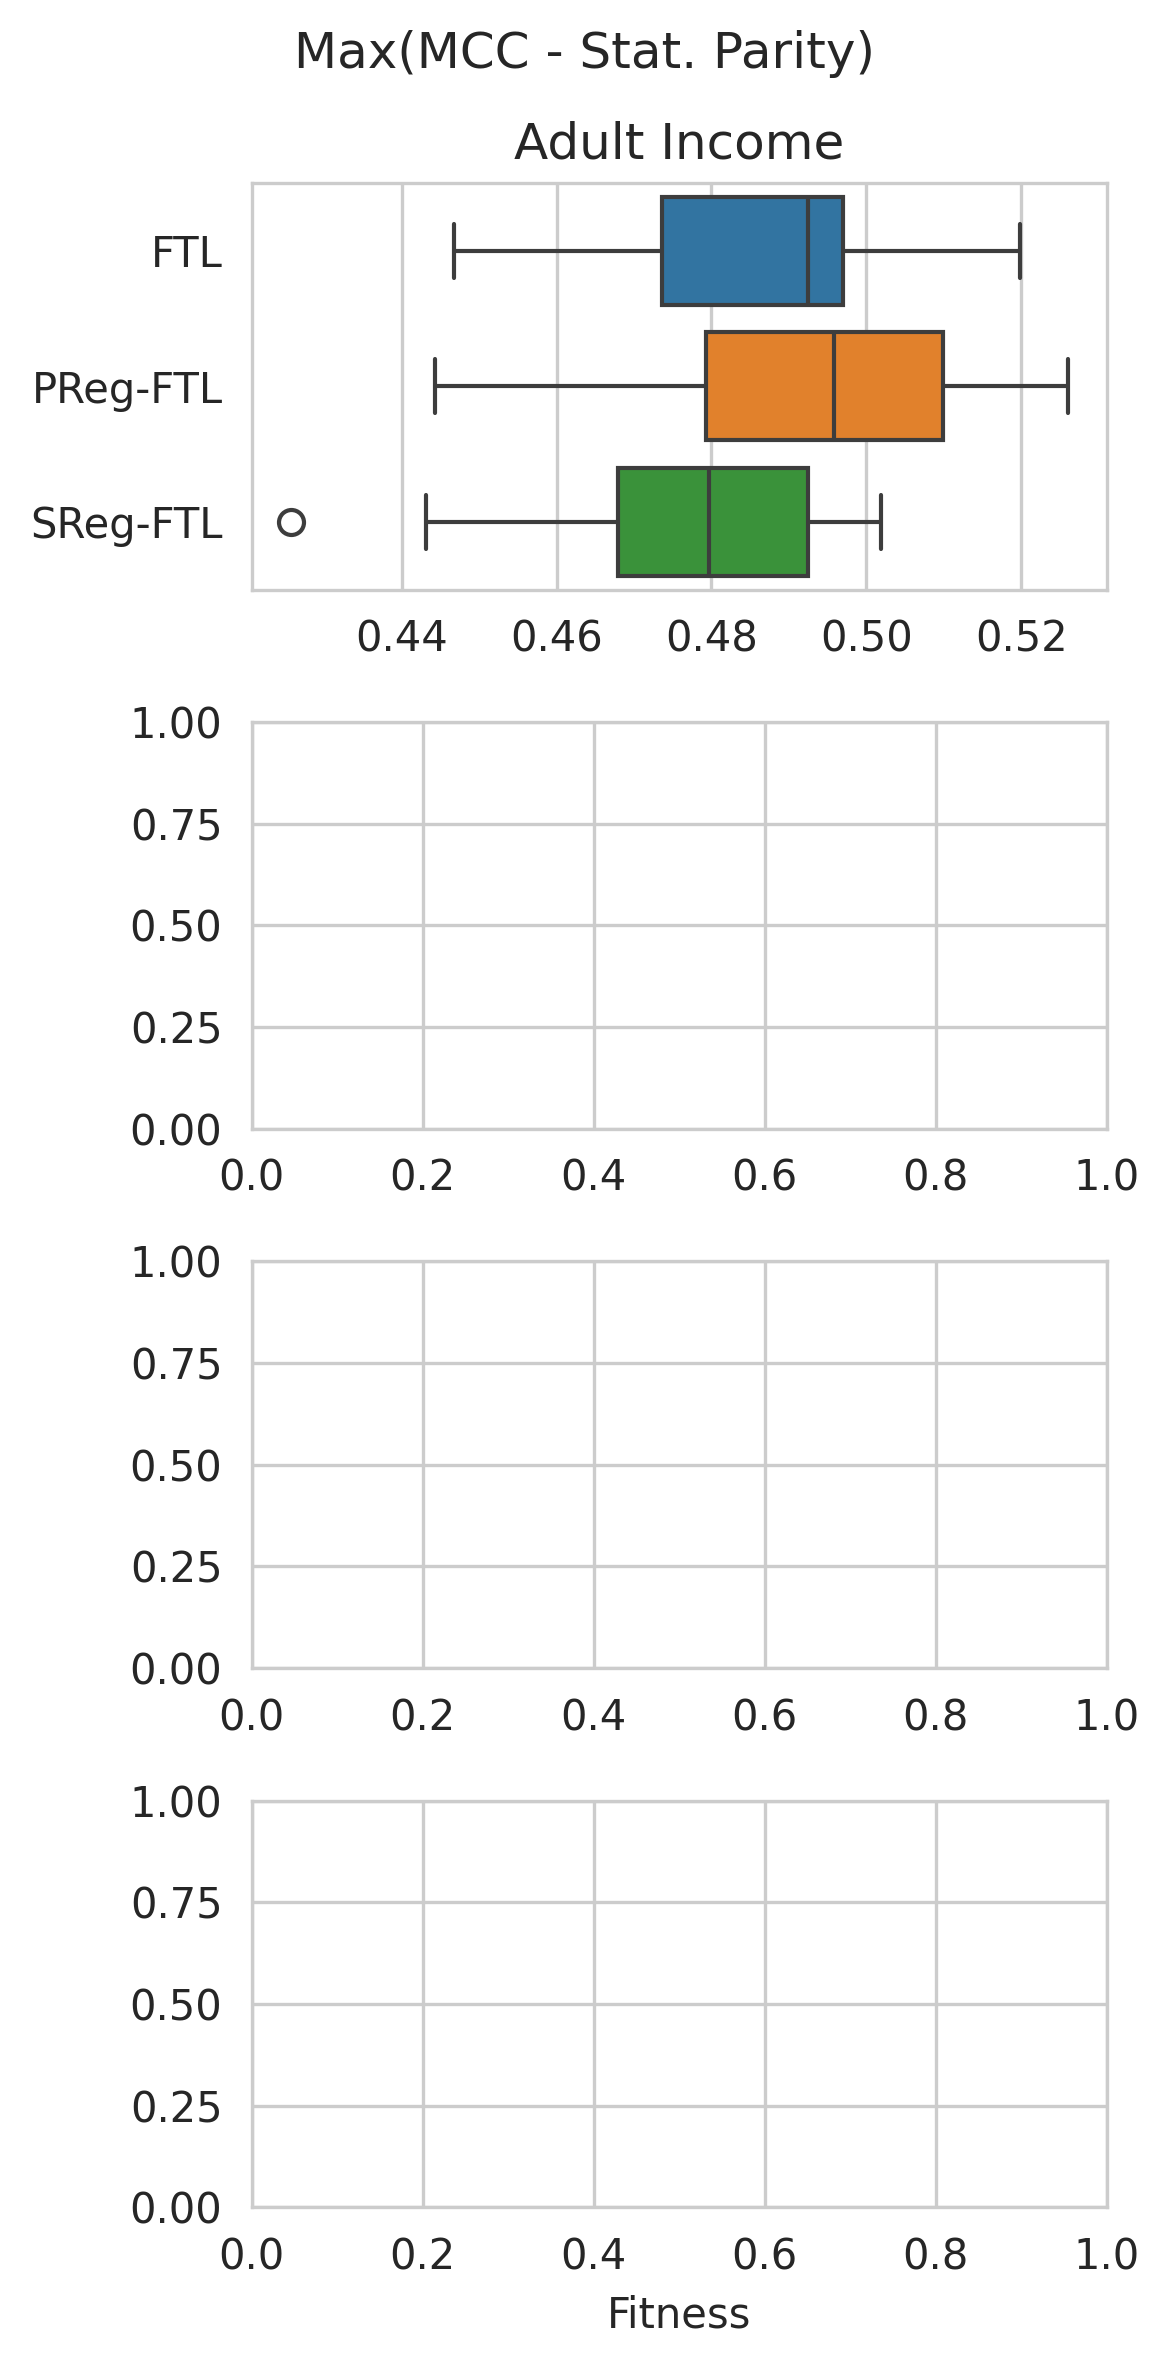

/tmp/ipykernel_1364125/1656981651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


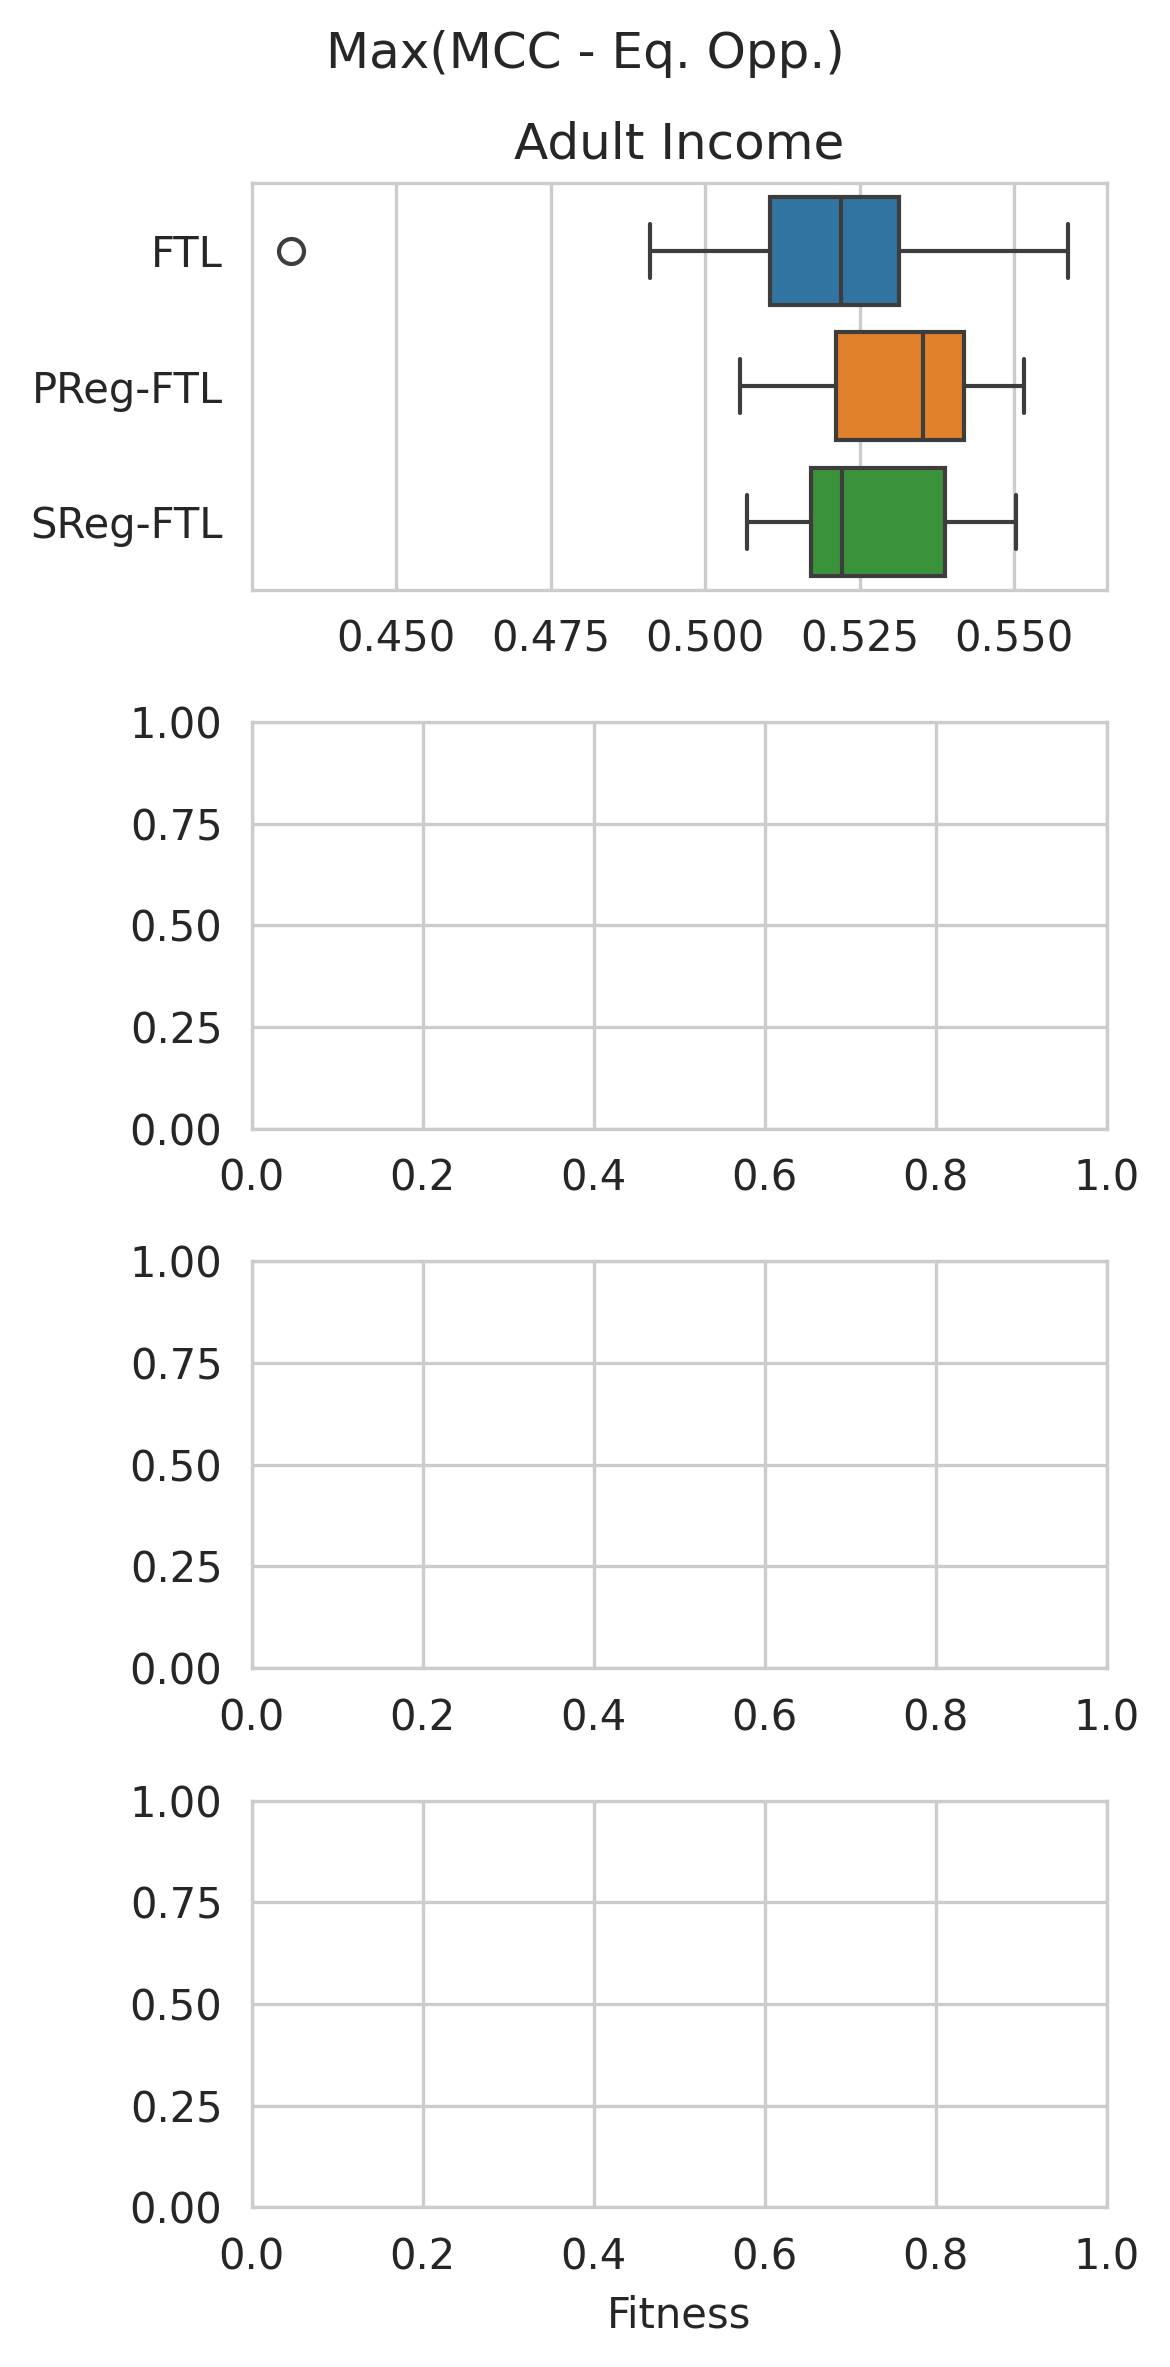

/tmp/ipykernel_1364125/1656981651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


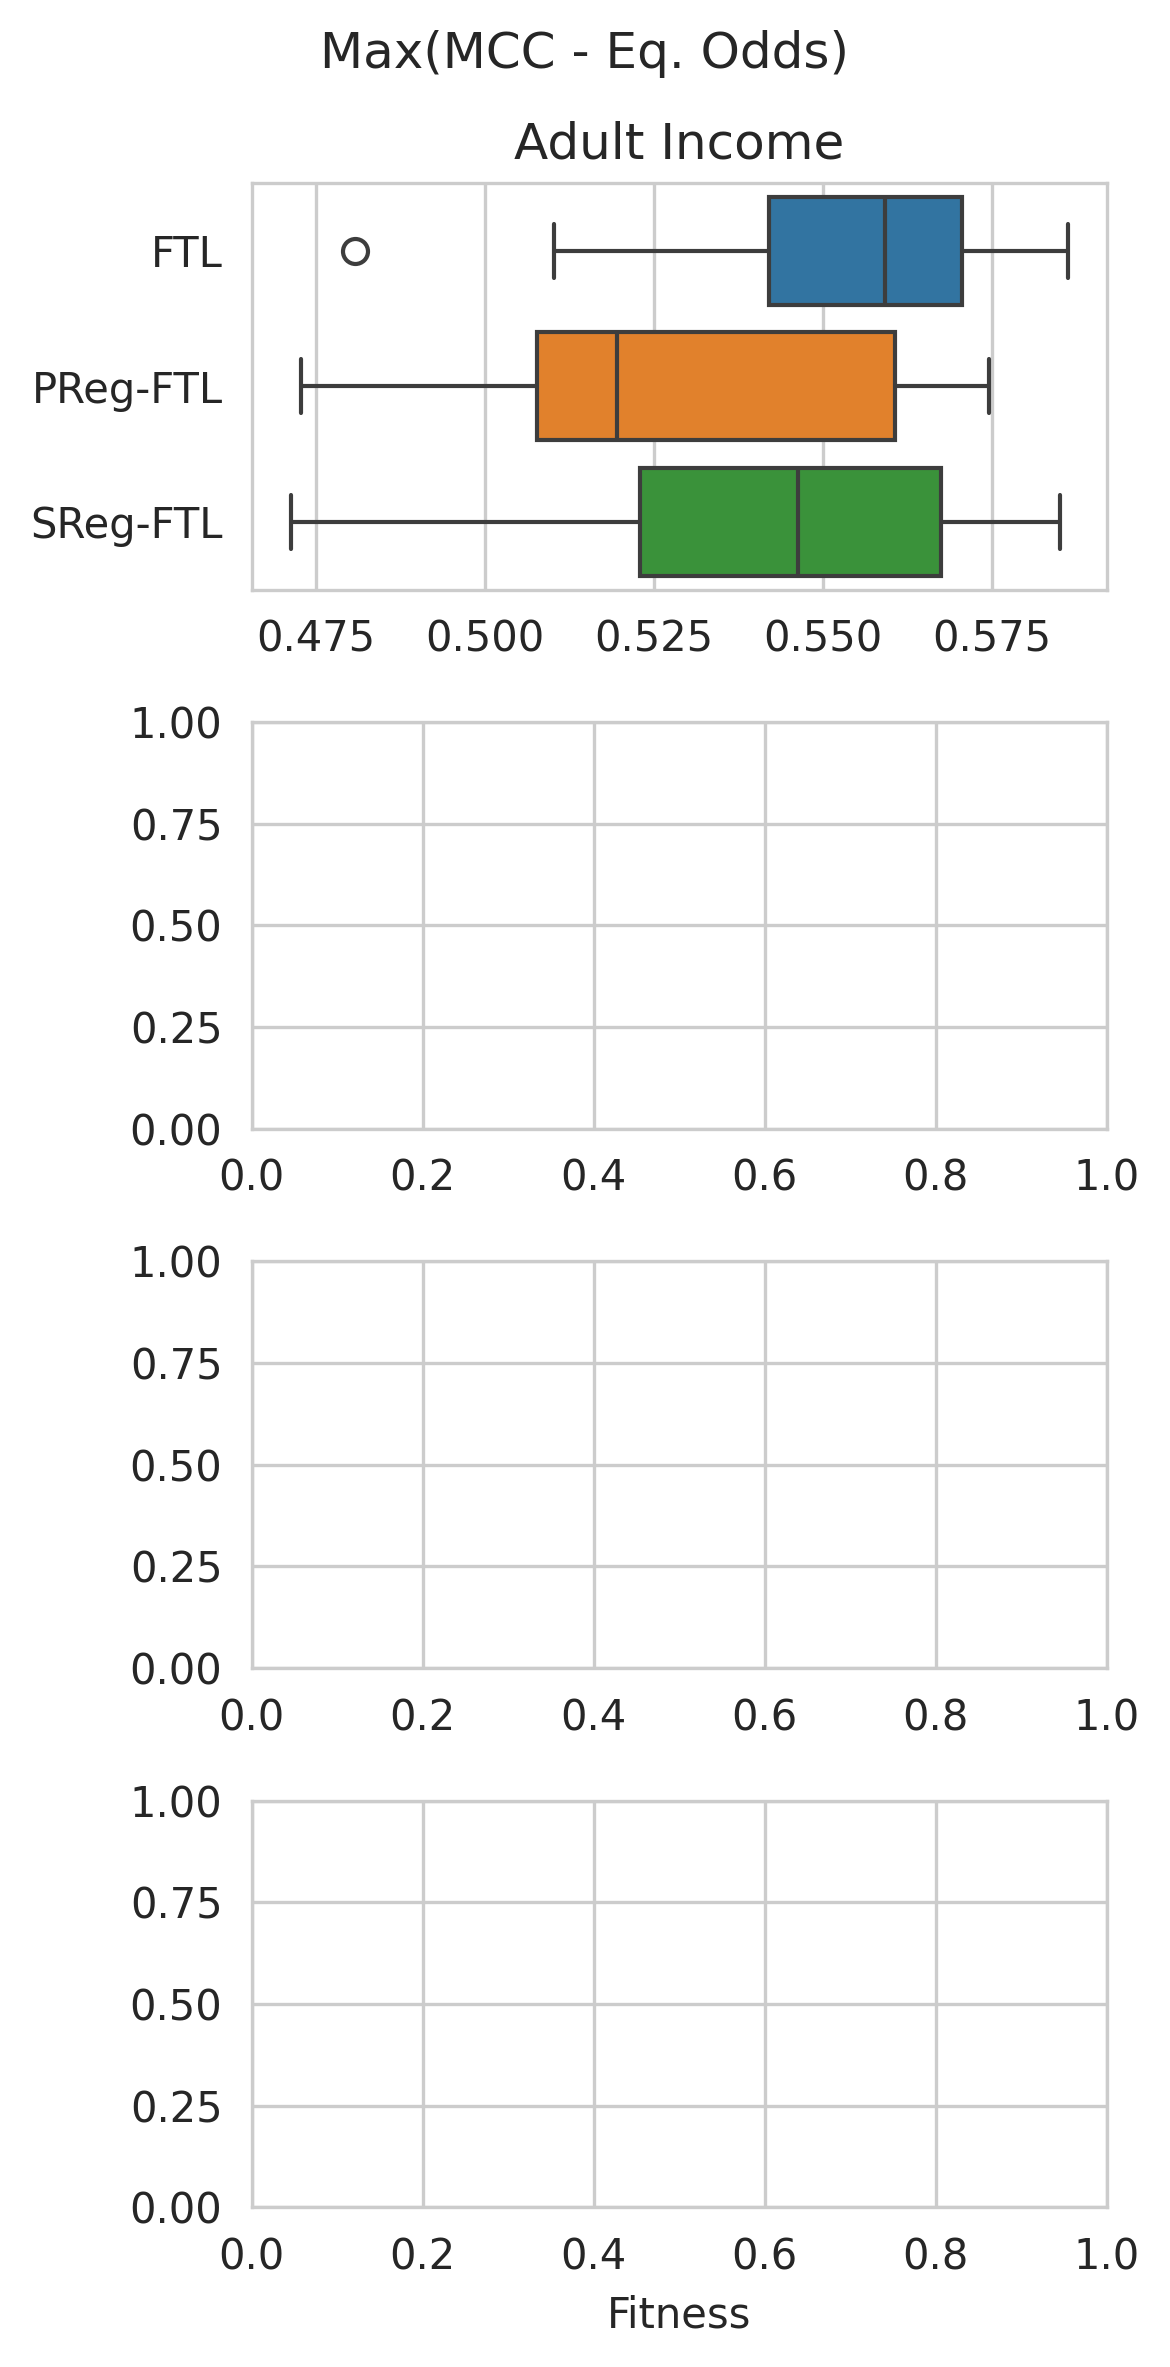

/tmp/ipykernel_1364125/1656981651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


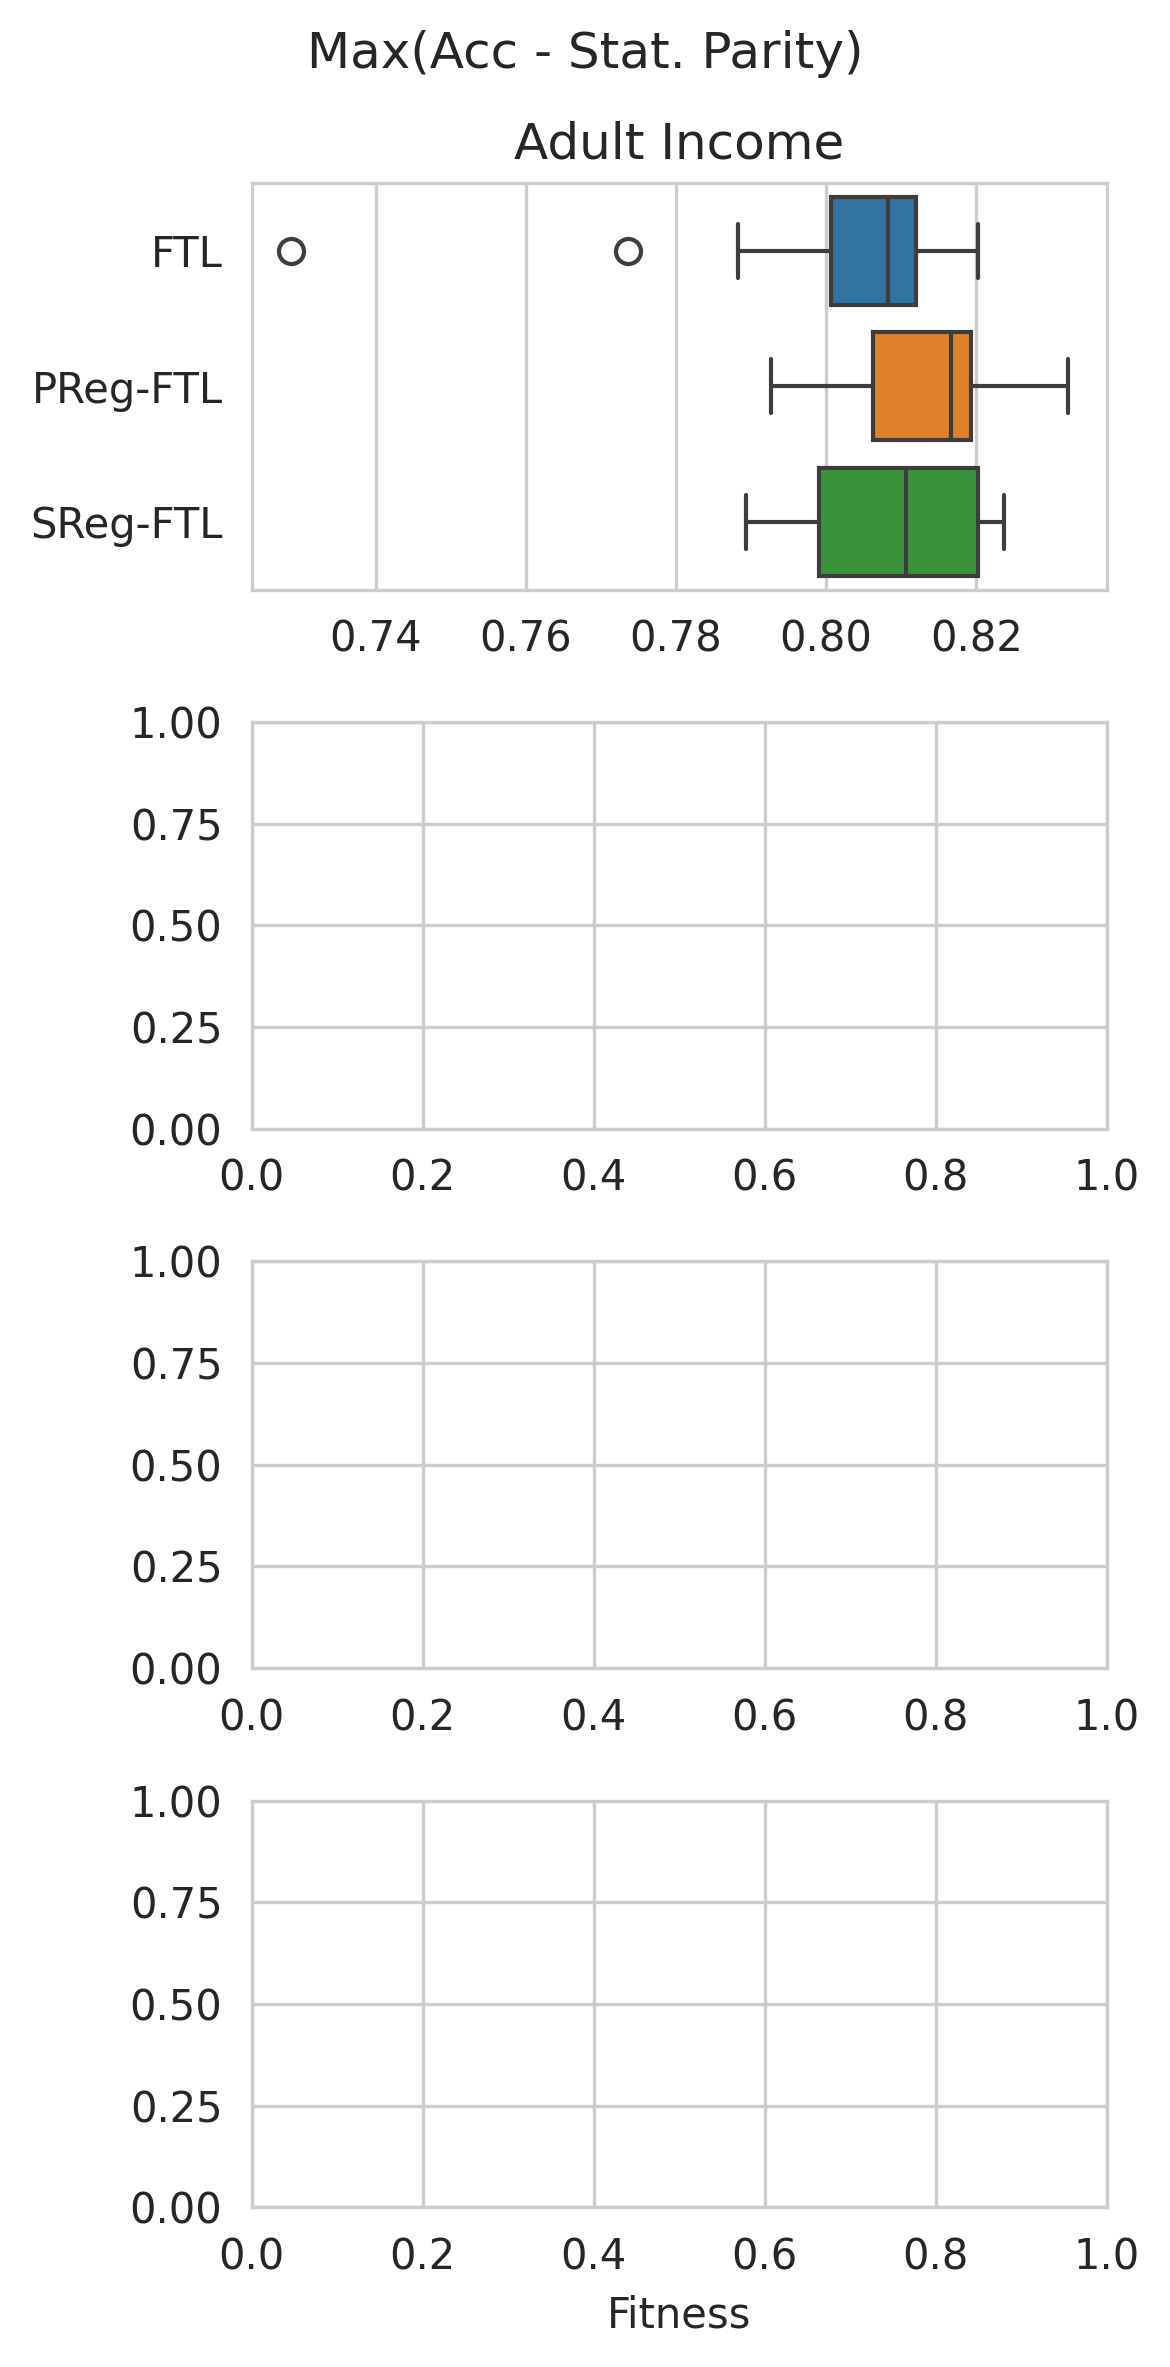

/tmp/ipykernel_1364125/1656981651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


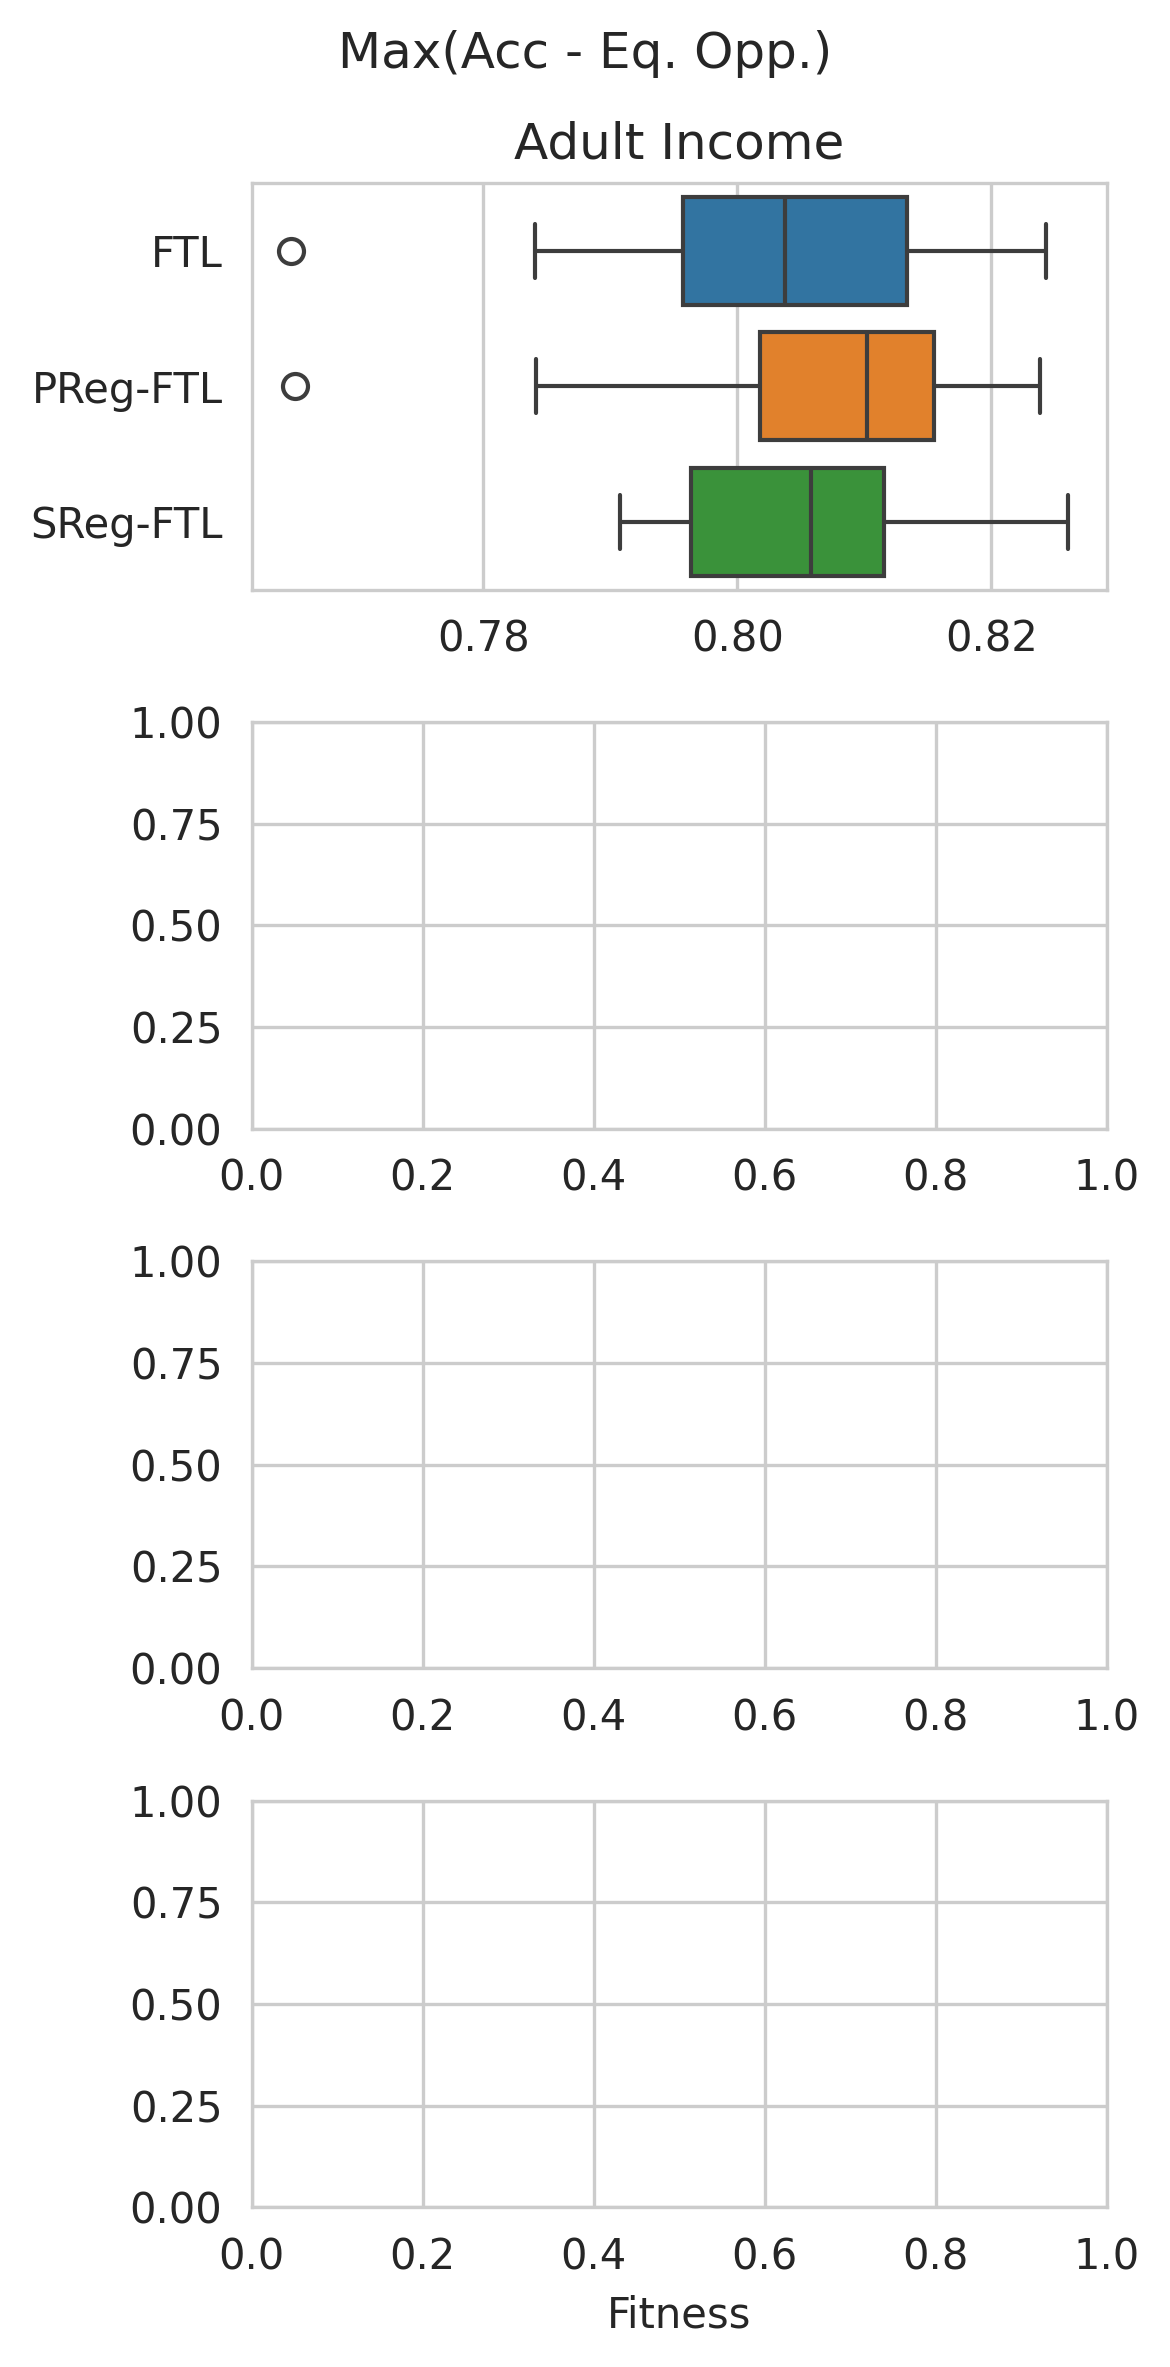

/tmp/ipykernel_1364125/1656981651.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


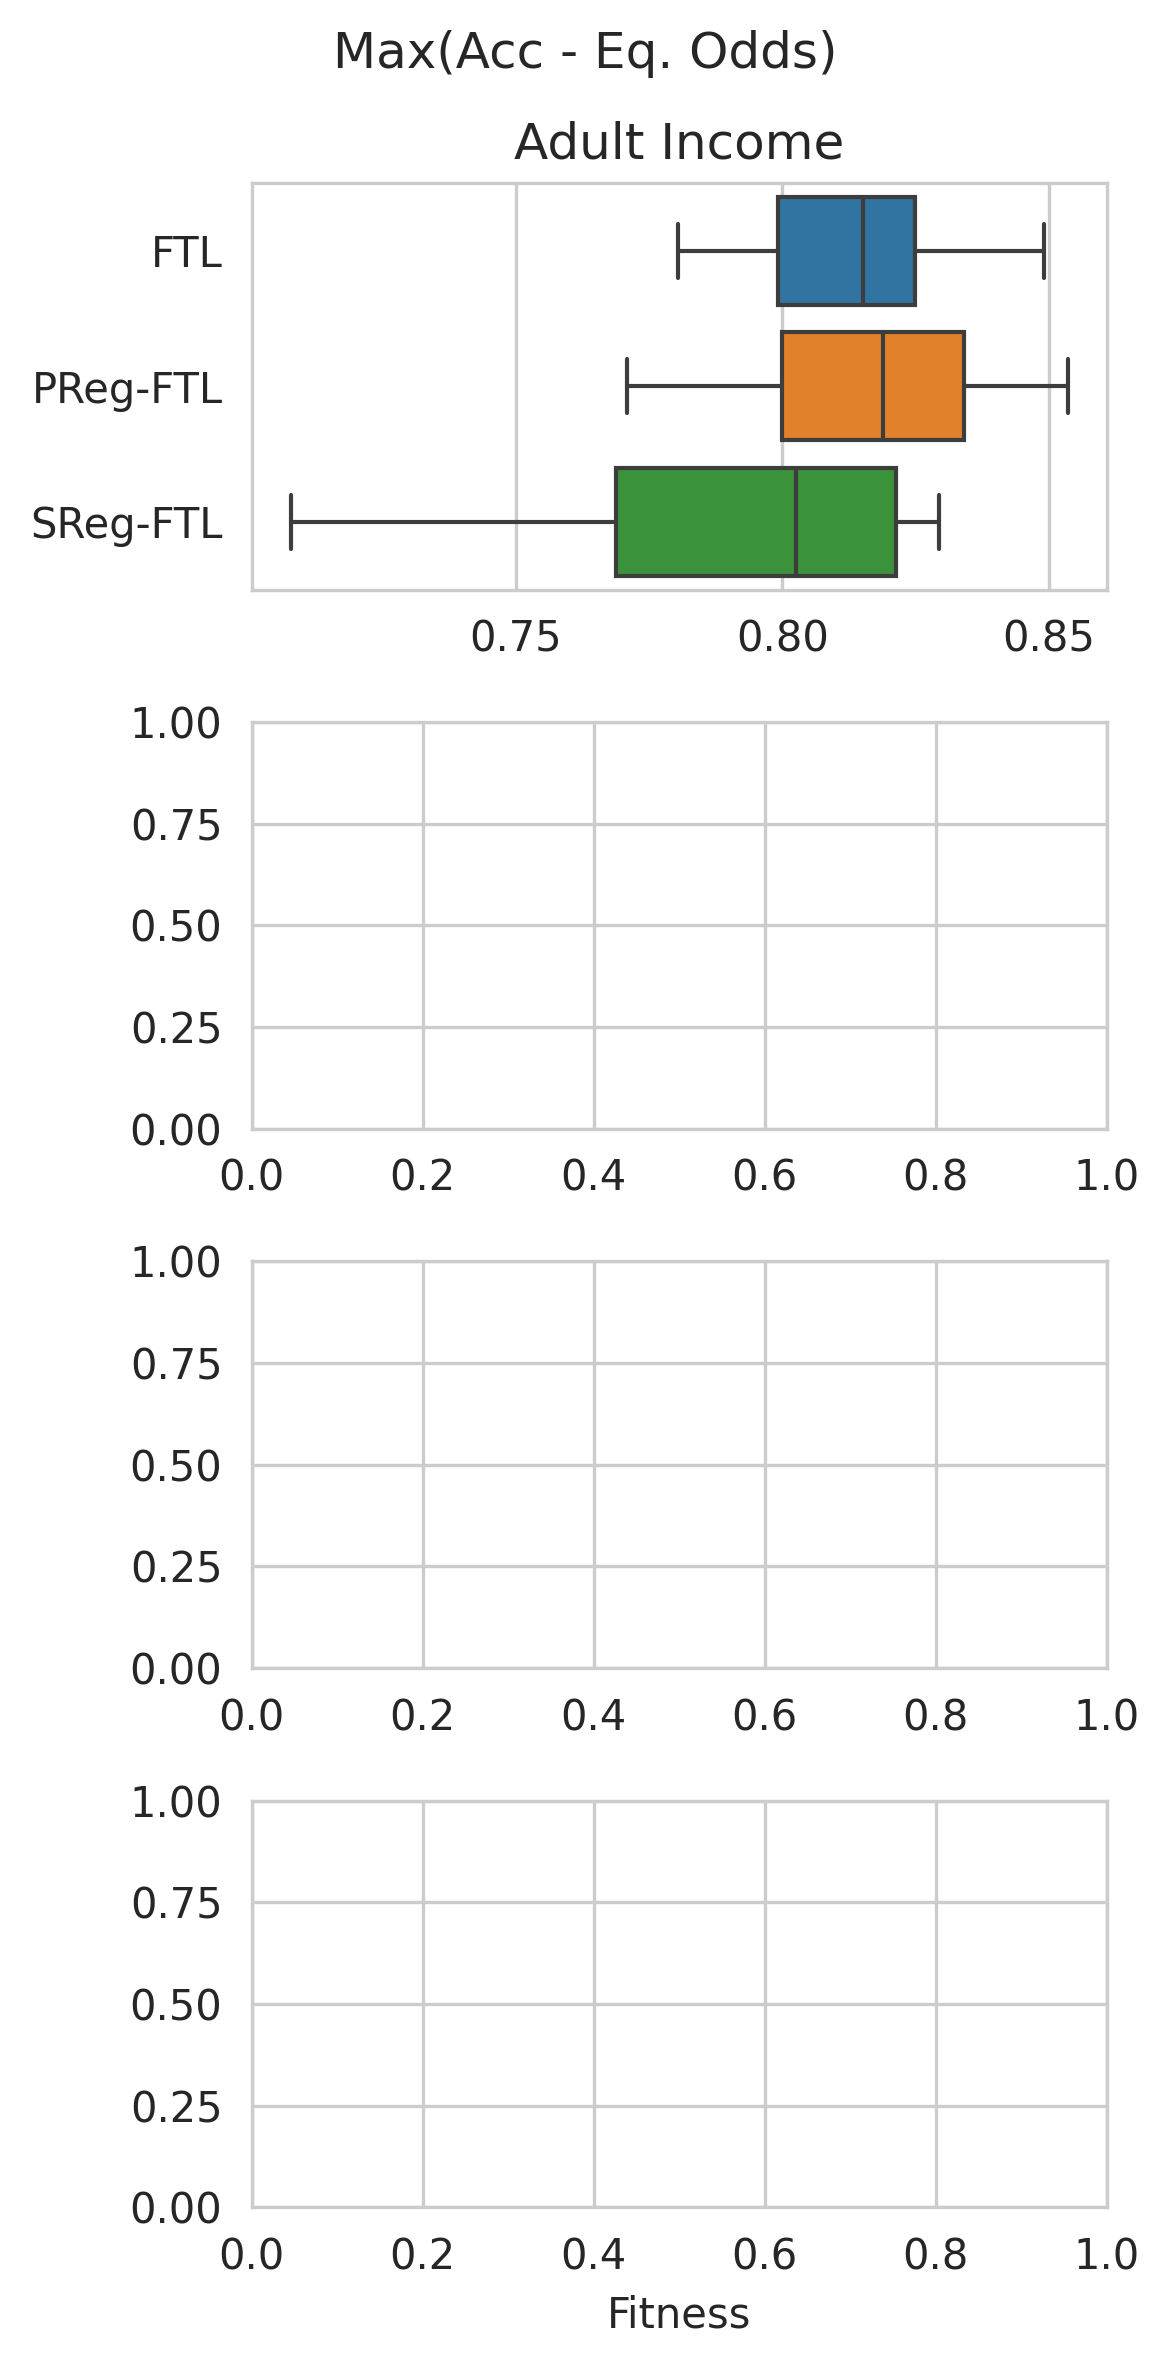

In [34]:
for fitness_rule in fitness_rules:
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(4, 8))
    fig.subplots_adjust(hspace=0.7)
    fig.suptitle(fitness_rules_abvr[fitness_rule])

    for dataset, ax in zip(sorted(datasets), axes.flatten()):
        by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
        by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
        by_fitness_rule = by_fitness_rule.sort_values(by='method')

        boxplot = sns.boxplot(data=by_fitness_rule, hue='method',
                    x='fitness', y='method', ax=ax)

        #ax.set_ylabel(dataset)
        #ax.yaxis.set_label_position("right")
        ax.set_title(dataset)
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Remove y-ticks from the second column
        if ax.get_subplotspec().colspan.start != 0:
            ax.set_yticks([])


        # Remove x-ticks and labels from all but the last row
        if ax.get_subplotspec().rowspan.start != 3:
            ax.set_xlabel('')


    # Set x-labels for the last row
    axes[-1].set_xlabel('Fitness')

    plt.tight_layout()
    plt.savefig('plots/boxplot_%s.pdf' % fitness_rule)
    plt.show()